Deep dive into Topic Modelling and Sentiment Analysis and Open AI prompts

This project is my turbo button for learning Topic modelling using LDA , exploring sentiment analysis using VADER and enhancing topic modelling using prompt engineering with LLM applications provided by Open AI 

Importing libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

Loading the dataset

In [2]:
dataset = pd.read_csv('npr.csv')
print('\nHead of the datafame:\n')
dataset.head()


Head of the datafame:



,Article
0,"In the Washington of 2016, even when the polic..."
1,Donald Trump has used Twitter — his prefe...
2,Donald Trump is unabashedly praising Russian...
3,"Updated at 2:50 p. m. ET, Russian President Vl..."
4,"From photography, illustration and video, to d..."


Remove the punctuations for Article

In [3]:
# Use regular expression to prune the text
import re

In [4]:
dataset['Article']=dataset['Article'].map(lambda x: re.sub('[\'\|,\.!?:-]', '', x))

Preserve only letters and numbers

In [5]:
# Remove special symbols that does not appear in the above punctuation sets
dataset['Article']=dataset['Article'].map(lambda x: re.sub('[^ a-zA-Z0-9 ]', '', x))

Lower all cases

In [6]:
dataset['Article']=dataset['Article'].map(lambda x: x.lower())

Trim multiple spaces between words

In [58]:


dataset['Article']=dataset['Article'].map(lambda x: x.strip())



Remove stopwords and stemming

In [3]:
# from gensim.utils import simple_preprocess
data = dataset['Article'].values.tolist()

Stemming

In [4]:
import gensim
from gensim.parsing.porter import PorterStemmer

p = PorterStemmer()
stemmed_data=p.stem_documents(data)
## Tokenize the data
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
        
data_words = list(sent_to_words(stemmed_data))

Remove stop words

In [5]:
# Download the most up-to-date stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Kasturi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
# Specify the language of stopwords
stop_words = stopwords.words('english')
# Add context-specific stop wards, such as ['subject', 're', 'edu', 'use']
#stop_words.extend(['subject', 're', 'edu', 'use'])

In [7]:
from gensim.utils import simple_preprocess

In [8]:
# Now remove stop words
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]


data_words = remove_stopwords(data_words)

In [45]:
# Assuming data_words is a list of tokenized documents
print(data_words[62])  # Change the index (62 in this case) to the row you want to print

['promin', 'conserv', 'sign', 'letter', 'warn', 'donald', 'trump', 'need', 'sell', 'hi', 'busi', 'address', 'hi', 'mani', 'conflict', 'interest', 'respectfully', 'cannot', 'serv', 'countri', 'presid', 'also', 'busi', 'enterprise', 'without', 'serious', 'damag', 'presidency', 'sai', 'letter', 'sent', 'mondai', 'bipartisan', 'group', 'politicians', 'ethic', 'advoc', 'academics', 'letter', 'wa', 'sign', 'sever', 'moder', 'republicans', 'includ', 'former', 'new', 'jersei', 'gov', 'christin', 'todd', 'whitman', 'former', 'minnesota', 'gov', 'arn', 'carlson', 'former', 'rep', 'mickei', 'edward', 'oklahoma', 'wa', 'chairman', 'hous', 'republican', 'polici', 'committee', 'signer', 'also', 'includ', 'conservatives', 'includ', 'peter', 'schweizer', 'presid', 'govern', 'account', 'institute', 'polit', 'consult', 'john', 'pudner', 'take', 'back', 'republic', 'seek', 'build', 'gop', 'support', 'campaign', 'financ', 'reform', 'pudner', 'wa', 'instrument', 'success', 'tea', 'effort', 'unseat', 'major

How to use LDA model ?
Topic modeling involves counting words and grouping similar word patterns to describe topics within the data. If the model knows the word frequency, and which words often appear in the same document, it will discover patterns that can group different words together.
I start with converting a collection of words to a bag of words, which is a list of tuples (word_id, word_frequency). gensim.corpora.Dictionary is a great tool for this:


Create dictionary for all words in all documents

In [9]:
import gensim.corpora as corpora
#Hint: use the Dictionary() function of corpora
vocab_dict = corpora.Dictionary(data_words)


Create a corpus matrix that represents words with tokens (i.e., Term Document Frequency or # Bag-of-words representation of the documents.)

In [10]:
corpus = [vocab_dict.doc2bow(text) for text in data_words]

In [11]:
# Print the bag-of-words representation of the first document
print(corpus[0])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 4), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 2), (13, 1), (14, 1), (15, 1), (16, 2), (17, 1), (18, 2), (19, 2), (20, 1), (21, 6), (22, 1), (23, 1), (24, 1), (25, 1), (26, 2), (27, 2), (28, 1), (29, 3), (30, 1), (31, 1), (32, 3), (33, 1), (34, 2), (35, 2), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 2), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 7), (57, 4), (58, 1), (59, 1), (60, 1), (61, 2), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1), (67, 2), (68, 1), (69, 1), (70, 1), (71, 1), (72, 1), (73, 1), (74, 2), (75, 3), (76, 1), (77, 1), (78, 1), (79, 1), (80, 3), (81, 2), (82, 1), (83, 1), (84, 1), (85, 1), (86, 1), (87, 1), (88, 1), (89, 1), (90, 1), (91, 1), (92, 1), (93, 1), (94, 1), (95, 1), (96, 2), (97, 1), (98, 1), (99, 1), (100, 1), (101, 1), (102, 1), (103, 1), (104, 1), (105, 1), (106, 1), (107, 1), (108, 1), (109, 1), (110, 1),

In [12]:
# Specify the number of topics
num_topics = 5

Build LDA model

In [13]:
lda_model = gensim.models.LdaModel(corpus=corpus,
                                       id2word=vocab_dict,
                                       num_topics=num_topics,
                                       chunksize = 1000,
                                       random_state=1,
                                       iterations=5000)

Print the top 50 keywords of the 5 topics

In [14]:
import pprint
from pprint import pprint
# Hint: Print the keywords with pprint() function
pprint(lda_model.print_topics(5,50))

[(0,
  '0.027*"wa" + 0.016*"hi" + 0.008*"thi" + 0.008*"thei" + 0.007*"like" + '
  '0.006*"peopl" + 0.005*"said" + 0.005*"ar" + 0.005*"sai" + 0.005*"go" + '
  '0.005*"time" + 0.005*"ha" + 0.004*"year" + 0.004*"know" + 0.004*"think" + '
  '0.004*"want" + 0.004*"first" + 0.004*"says" + 0.003*"would" + 0.003*"back" '
  '+ 0.003*"black" + 0.003*"new" + 0.003*"becaus" + 0.003*"get" + '
  '0.003*"polic" + 0.003*"live" + 0.003*"work" + 0.003*"us" + 0.003*"music" + '
  '0.003*"life" + 0.003*"thing" + 0.003*"love" + 0.003*"make" + 0.003*"feel" + '
  '0.003*"come" + 0.002*"man" + 0.002*"also" + 0.002*"even" + 0.002*"two" + '
  '0.002*"mani" + 0.002*"veri" + 0.002*"show" + 0.002*"realli" + 0.002*"call" '
  '+ 0.002*"got" + 0.002*"made" + 0.002*"never" + 0.002*"see" + 0.002*"song" + '
  '0.002*"told"'),
 (1,
  '0.010*"ar" + 0.009*"sai" + 0.008*"state" + 0.008*"said" + 0.008*"ha" + '
  '0.007*"health" + 0.007*"thei" + 0.007*"wa" + 0.006*"law" + 0.006*"would" + '
  '0.006*"peopl" + 0.005*"thi" + 0.00

There seem to be some patterns here. The first topic may be politics, and the second topic may be Culture,3 rd topic  but the pattern is not clear.

Now try to print top 30 keywords.

In [15]:
pprint(lda_model.print_topics(5,30))

[(0,
  '0.027*"wa" + 0.016*"hi" + 0.008*"thi" + 0.008*"thei" + 0.007*"like" + '
  '0.006*"peopl" + 0.005*"said" + 0.005*"ar" + 0.005*"sai" + 0.005*"go" + '
  '0.005*"time" + 0.005*"ha" + 0.004*"year" + 0.004*"know" + 0.004*"think" + '
  '0.004*"want" + 0.004*"first" + 0.004*"says" + 0.003*"would" + 0.003*"back" '
  '+ 0.003*"black" + 0.003*"new" + 0.003*"becaus" + 0.003*"get" + '
  '0.003*"polic" + 0.003*"live" + 0.003*"work" + 0.003*"us" + 0.003*"music" + '
  '0.003*"life"'),
 (1,
  '0.010*"ar" + 0.009*"sai" + 0.008*"state" + 0.008*"said" + 0.008*"ha" + '
  '0.007*"health" + 0.007*"thei" + 0.007*"wa" + 0.006*"law" + 0.006*"would" + '
  '0.006*"peopl" + 0.005*"thi" + 0.005*"year" + 0.005*"feder" + 0.005*"care" + '
  '0.004*"new" + 0.004*"says" + 0.004*"court" + 0.004*"percent" + 0.004*"also" '
  '+ 0.004*"report" + 0.004*"plan" + 0.004*"case" + 0.003*"get" + '
  '0.003*"compani" + 0.003*"school" + 0.003*"million" + 0.003*"public" + '
  '0.003*"program" + 0.003*"could"'),
 (2,
  '0.020*

Check the topic distribution for a specific document (document index )

In [16]:
# First, construct a dictionary of topics
doc_indx = 0
topic_lst = lda_model.print_topics()
topic_dict = dict(topic_lst)

In [17]:
# Access the topic with index 0
print(topic_dict[0])

0.027*"wa" + 0.016*"hi" + 0.008*"thi" + 0.008*"thei" + 0.007*"like" + 0.006*"peopl" + 0.005*"said" + 0.005*"ar" + 0.005*"sai" + 0.005*"go"


In [18]:
pip install vaderSentiment

Note: you may need to restart the kernel to use updated packages.


One of the most effective ways to understand data is through visualization. Is there a way that we can visualize the results of LDA? Yes, we can with pyLDAvis.

PyLDAvis allows us to interpret the topics in a topic model.pyLDAvis is a interactive LDA visualization python package. 

In [19]:
import pyLDAvis.gensim


pyLDAvis.enable_notebook()
vis =pyLDAvis.gensim.prepare(lda_model, corpus,vocab_dict)
pyLDAvis.save_html(vis, 'lda_result.html')


In [20]:
from IPython.display import HTML
display(HTML('lda_result.html'))

Results of lda model could be inyterpreted as :

Inferring the LDA Model visually:

Topic Bubble:

The representation includes topics distribution in the 2-dimensional space (left side panel).These topics are represented in the form of bubbles.

The larger the bubble, the more frequent is the topic in the documents.

A topic model with a low number of topics will have big non-overlapping bubbles, scattered throughout the chart whereas, the topic model with a high number of topics, will have many overlapping small size bubbles, clustered in the chart.

Distance between the topics is an approximation of semantic relationship between the topics.

The topic which shares common words will be overlapping (closer in distance) in comparison to the non-overlapping topic.

Horizontal Bar Graph:

The bar graph shows the frequency distribution of the words in the documents (color: blue).

The red shaded area describes the frequency of each word given a topic.

On selecting a topic (clicking on a topic bubble), top 10 words (with the red-shaded area) are shown.

Hovering over the specific words (in the right panel), only the topic containing the words are visible. The size of the bubble in this scenario describes the weight age of the word on that topic. Higher the weight of the selected word, larger will be the size of the bubble.

Re - Rank words in topics based on their frequency: by varying λ lambda parameter.

Decreasing the lambda parameter, increase the weight of the ratio of the frequency of word given the topic / Overall frequency of the word in the documents.Important words for the given topic moves upward.

Following are the most likely representations : 
    Bubble 1 - represented by topic 3 Culture
    Bubble 2 - represented by topic 2 Politics
    Bubble 3 - represented by topic 0 Education
    Bubble 4 - represented by topic 1 HealthCare
    Bubble 5 - represented by topic 4 Entertainment

Coherence Score: Calculate the coherence score for your topics. Coherence measures the semantic similarity between high-scoring words in each topic and helps ensure that the words within a topic are meaningful and related. Higher coherence scores indicate better-defined topics. Common coherence measures include UMass and CV coherence.

In [21]:
from gensim.models import CoherenceModel

# Assuming lda_model is your LDA model and corpus is your document-term matrix
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words, dictionary=vocab_dict, coherence='c_v')

coherence_lda = coherence_model_lda.get_coherence()

print(f'Coherence Score: {coherence_lda}')

Coherence Score: 0.30341949849578626


Visualizations: Use visualizations like word clouds to display the most important words for each topic and their relative frequencies. Visualizations can help you understand the distribution of topics and assess their quality.

In [113]:
pip install wordcloud --upgrade

Note: you may need to restart the kernel to use updated packages.


C:\Users\Kasturi\anaconda3\lib\site-packages\wordcloud\wordcloud.py:522: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
C:\Users\Kasturi\anaconda3\lib\site-packages\wordcloud\wordcloud.py:522: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
C:\Users\Kasturi\anaconda3\lib\site-packages\wordcloud\wordcloud.py:522: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
C:\Users\Kasturi\anaconda3\lib\site-packages\wordcloud\wordcloud.py:522: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE

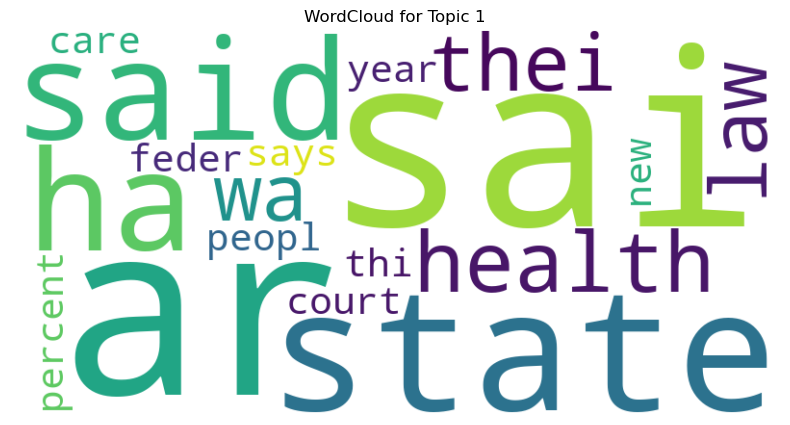

In [23]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Define a function to get the top words for a given topic
def get_top_words_for_topic(model, topic_id, topn=20):
    topic_terms = model.show_topic(topic_id, topn=topn)
    return [term[0] for term in topic_terms]

# Get the top words for Topic 1
topic_0_words = get_top_words_for_topic(lda_model, topic_id=1)

# Create a WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(topic_0_words))

# Display the WordCloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud for Topic 1')
plt.show()

Wordcloud for topic 1 shows it is related to HealthCare

C:\Users\Kasturi\anaconda3\lib\site-packages\wordcloud\wordcloud.py:522: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
C:\Users\Kasturi\anaconda3\lib\site-packages\wordcloud\wordcloud.py:522: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
C:\Users\Kasturi\anaconda3\lib\site-packages\wordcloud\wordcloud.py:522: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
C:\Users\Kasturi\anaconda3\lib\site-packages\wordcloud\wordcloud.py:522: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE

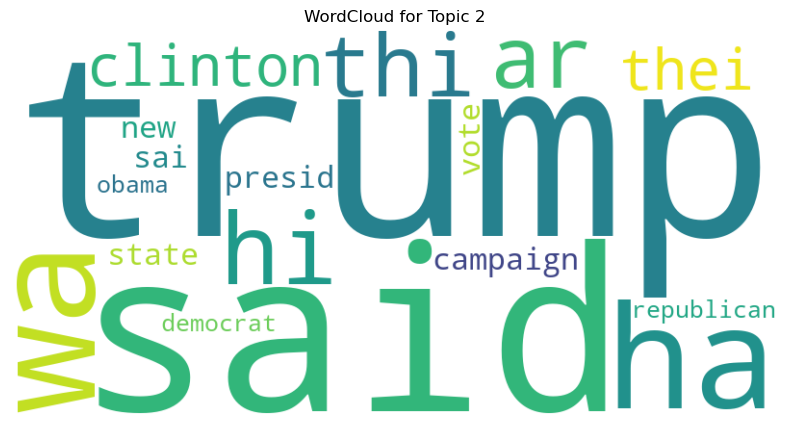

In [25]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming lda_model is your LDA model
# Replace 'lda_model' with the actual name of your LDA model

# Define a function to get the top words for a given topic
def get_top_words_for_topic(model, topic_id, topn=20):
    topic_terms = model.show_topic(topic_id, topn=topn)
    return [term[0] for term in topic_terms]

# Get the top words for Topic 2
topic_0_words = get_top_words_for_topic(lda_model, topic_id=2)

# Create a WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(topic_0_words))

# Display the WordCloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud for Topic 2')
plt.show()

Wordcloud for topic 2 shows it is related to Politics

Sentiment analysis 

In [46]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [47]:
# Function to calculate sentiment scores for each document
def calculate_sentiment_score(text):
    analyser = SentimentIntensityAnalyzer()
    score = analyser.polarity_scores(text)
    return score['compound']  # Using compound score as an overall sentiment indicator

In [48]:
# Function to calculate sentiment categories for each document
def get_sentiment_category(sentence):
    analyser = SentimentIntensityAnalyzer()
    score = analyser.polarity_scores(sentence)
    
    # Determine sentiment category based on compound score
    if score['compound'] >= 0.05:
        return 'Positive'
    elif score['compound'] <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

In [ ]:
# Add a new column for sentiment scores
dataset['sentiment_score'] = dataset['Article'].apply(calculate_sentiment_score)
# Add a new column for sentiment category
dataset['sentiment'] =dataset['Article'].apply(get_sentiment_category)


In [ ]:
# Get the topic distribution for each document
topic_distribution = [max(lda_model.get_document_topics(doc), key=lambda x: x[1])[0] for doc in corpus]
# Creating a DataFrame with topics

df_new = pd.DataFrame({'Article': dataset['Article'], 'topic': topic_distribution, 'sentiment_score': dataset['sentiment_score'],\
                     'sentiment': dataset['sentiment'] })

In [50]:

# Display the DataFrame
print(df_new.head(20))

                                    Article  topic  sentiment_score sentiment
0   In the Washington of 2016, even when...      2           0.9951  Positive
1   Donald Trump has used Twitter  —   h...      2          -0.6860  Negative
2   Donald Trump is unabashedly praising...      2           0.9840  Positive
3   Updated at 2:50 p. m. ET, Russian Pr...      2          -0.0258   Neutral
4   From photography, illustration and v...      1           0.9888  Positive
5   I did not want to join yoga class. I...      3           0.9781  Positive
6   With a   who has publicly supported ...      3           0.6487  Positive
7   I was standing by the airport exit, ...      3           0.9952  Positive
8   If movies were trying to be more rea...      3          -0.3684  Negative
9   Eighteen years ago, on New Year’s Ev...      3           0.9988  Positive
10  For years now, some of the best, wil...      4           0.9745  Positive
11  For years now, some of the best, wil...      4          -0.9

In [54]:
#df_final = pd.DataFrame({'Article': dataset['Article'], 'sentiment': dataset['sentiment'],'topic': topic_distribution})

In [51]:
# Mapping topics to labels
#topic_label = {0: 'Entertainment', 1: 'HealthCare', 2: 'Politics', 3: 'EnvironmentalStudies', 4: 'Entertainment'}
#topic_label = {0: 'Culture', 1: 'HealthCare', 2: 'Politics', 3: 'Education', 4: 'HealthCare'}
#topic_label = {0: 'Politics', 1: 'Culture', 2: 'Entertainment', 3: 'Education', 4: 'HealthCare'}
#topic_label = {0: 'World Politics', 1: 'Healthcare', 2: 'Education', 3: 'US Election', 4: 'Culture'}
#df_final['topic_name'] = df_final['topic'].map(topic_label)
#pd.set_option('display.max_colwidth', 40)
# Display the DataFrame
print(df_final.head(20))
# Display the full text of the article at index 4
#print("Full text of the article at index 4:")
#print(df_new['Article'].iloc[4])

In [ ]:
# Filter DataFrame for articles belonging to Topic 4
#topic_4_articles = df_new[df_new['topic'] == 0]['Article']
# Display the articles
print(topic_4_articles)

Use Open AI LLM GPt to do topic modelling.

In [115]:
import os
import pandas as pd
import json
# import panel as pn  # GUI
# pn.extension()
import matplotlib.pyplot as plt
import seaborn as sns
import openai

# from dotenv import load_dotenv, find_dotenv
# _ = load_dotenv(find_dotenv()) # read local .env file
import yaml

C:\Users\Kasturi\anaconda3\lib\site-packages\seaborn\rcmod.py:82: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
C:\Users\Kasturi\anaconda3\lib\site-packages\setuptools\_distutils\version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


Load api_key
If you would like to directly specify your api key, you could use: openai.api_key = 'insert your key here'

click here to learn how to use a file to save your api key

In [116]:
## method 1:
##openai.api_key = 'enter ur key'

## method 2:
with open('api_key.yaml') as f:
     use safe_load instead load
    api_dict = yaml.safe_load(f)
openai.api_key = api_dict['gpt_api']

In [137]:
## you could choose to use 'gpt-3.5-turbo' or 'gpt-4' model
def get_completion(prompt, model="gpt-4"):
    messages = [{"role": "user", "content": prompt}]
    response = openai.ChatCompletion.create(
        model=model,
        messages=messages,
        temperature=0, # higher temperature, more variation of the generated content
    )
    return response.choices[0].message["content"]

Topic modeling
Previously I talked about how to use LDA to extract topics from the textual data. GPT can also help us to conduct topic modeling. Below, I will illustrate how.Due to limitation of GPT tokens we will first consider 5 articles. Each article has couple a paragraph of text.

In [143]:
sf_df = pd.read_csv('npr.csv', nrows=5)

In [144]:
sf_df

,Article
0,"In the Washington of 2016, even when the polic..."
1,Donald Trump has used Twitter — his prefe...
2,Donald Trump is unabashedly praising Russian...
3,"Updated at 2:50 p. m. ET, Russian President Vl..."
4,"From photography, illustration and video, to d..."


In [145]:
sf_df['for_prompt'] = sf_df.apply(lambda x: ': '.join(x.values.astype(str)),axis=1)

In [146]:
# View the first 1 record
first_record = sf_df.head(1)

# Print the first record
print(first_record)

                                             Article  \
0  In the Washington of 2016, even when the polic...   

                                          for_prompt  
0  In the Washington of 2016, even when the polic...  


In [151]:
text_to_topic = '\n'.join(sf_df['for_prompt'])

prompt = """
In the following text, you will see a list of Articles. 
Can you summarize the main topics in Articles, and list first 2 sentences of Article column from sf_df dataframe text for each topic in bullet points and highlight each topic name ?
And here are all the Articles:
 {text_to_topic}
""".format(text_to_topic=text_to_topic)
response = get_completion(prompt)
print(response)

- **US Politics and Foreign Policy**: The articles discuss the political climate in Washington, the alleged Russian interference in the U.S. election, and the Obama administration's response. They also cover the incoming Trump administration's stance on these issues. 
  - "In the Washington of 2016, even when the policy can be bipartisan, the politics cannot. And in that sense, this year shows little sign of ending on Dec. 31."
  - "When President Obama moved to sanction Russia over its alleged interference in the U. S. election just concluded, some Republicans who had long called for similar or more severe measures could scarcely bring themselves to approve."

- **Trump's Use of Twitter for Foreign Policy**: The articles discuss how President-elect Donald Trump has used Twitter to comment on foreign policy issues, including his support for Israel, his stance on nuclear issues, and his relationship with China.
  - "Donald Trump has used Twitter  —   his preferred means of communication

In [ ]:
Thus gpt also can do reasonable topic modelling.